In [9]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [10]:
nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/nathanael/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [12]:
all_positive_tweets=twitter_samples.strings("positive_tweets.json")
all_negative_tweets=twitter_samples.strings("negative_tweets.json")

In [16]:
print(f"negative tweets: {len(all_negative_tweets)}")
print(f"postive tweets: {len(all_positive_tweets)}")

print(f"positive type: {type(all_positive_tweets)}")
print(f"single tweet type: {type(all_negative_tweets[0])}")

negative tweets: 5000
postive tweets: 5000
positive type: <class 'list'>
single tweet type: <class 'str'>


In [20]:
all_negative_tweets[:4]

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too']

In [22]:
all_positive_tweets[:4]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)']

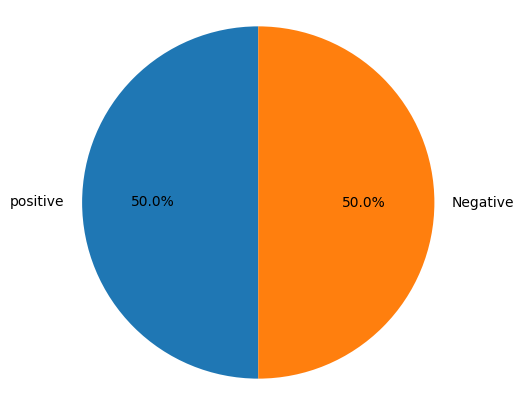

In [28]:
fig=plt.figure(figsize=(5,5))
labels="positive","Negative"
sizes=[len(all_positive_tweets),len(all_negative_tweets)]

plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=False,startangle=90)
plt.axis("equal")
plt.show()


In [37]:
print("\033[92m" + all_positive_tweets[random.randint(0,5000)])
print("\033[91m" + all_negative_tweets[random.randint(0,5000)])

Hi BAM ! @BarsAndMelody 
Can you follow my bestfriend @969Horan696 ? 
She loves you a lot :) 
See you in Warsaw &lt;3 
Love you &lt;3 x8
i don't wanna get up :(((


#### Preprocess raw text for sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

In [39]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nathanael/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
import re 
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [72]:
tweet=all_positive_tweets[2277]
tweet

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [78]:
print("\033[92m" + tweet)

tweet2=re.sub(r"^RT[\s]+","",tweet)
tweet2=re.sub(r"https?://[^\s\n\r]+","",tweet2)
tweet2=re.sub(r"#","",tweet2)
print("\033[94m"+tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


#### tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case.

In [95]:
print("\033[92m"+tweet2)
# instantiate tokenizer class
tokenizer=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tweet_token=tokenizer.tokenize(tweet2) # tokenize tweets
print("\033[94m")
print(tweet_token)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


#### Remove stop words and punctuations

In [84]:
stopwords_english=stopwords.words("english")
print(stopwords_english)
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [89]:
print("\033[92m")
print(tweet_token)
print("\033[94m")

tweets_clean=[]
for word in tweet_token:
    if (word not in stopwords_english and word not in string.punctuation):
        tweets_clean.append(word)

print(tweets_clean)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


#### stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er

We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**

NLTK has different modules for stemming and i will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.

In [91]:
import os
os.getcwd()

'/home/nathanael/Desktop/build/nlp'

In [98]:
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer=PorterStemmer() # Instantiate stemming class
tweet_stem=[]
for word in tweets_clean:
    stem_word=stemmer.stem(word)
    tweet_stem.append(stem_word)

print(tweet_stem)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


#### using utils much less code

In [96]:
from preprocessing_utils import *

In [101]:
tweet=all_positive_tweets[2277]
print('\033[92m')
print(tweet)
print('\033[94m')

tweet_final=process_tweet(tweet)
print(tweet_final)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
